# **Tarea: simulación y análisis de Paseos Aleatorios Simples.**
Esta tarea tiene como objetivo la implementación y análisis de paseos aleatorios simples en dos escenarios:
1. **Tiempo discreto:** $t\in\{1,2,\ldots,\}$.
2. **Tiempo continuo:** $t\in [0,  \infty)$.

Además, se realizará un **análisis estadístico** del proceso en distintos instantes de tiempo y se utilizará el **método de Montecarlo** para validar las propiedades del proceso.

## **Librerías a utilizar.**
Las librerias a utilizar quedan definidas para poder instalarse en un `requirements.txt` file.

In [126]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

## **Parte 1: Paseo Aleatorio Simple en tiempo discreto.**
Un **paseo aleatorio simple** es un proceso estocástico definido por:
$$
S_t = S_{t-1} + X_t, \quad t = 1, 2, 3, \dots
$$

dónde:
- $S_t$  representa la posición en el instante  $t$.
- $X_t$  es una variable aleatoria i.i.d. tales que:
  $$
  X_t =
  \begin{cases} 
  +1, & \text{con probabilidad } \frac{1}{2} \\
  -1, & \text{con probabilidad } \frac{1}{2} 
  \end{cases}
  $$

Se pide:
1. Fijar la semilla de reproducibilidad en 987.
2. Generar 200 realizaciones del paseo aleatorio en tiempo discreto.
3. Representar gráficamente las trayectorias de las 200 simulaciones en la misma figura.

### Paso 1. Fijar la semilla de reproducibilidad.

In [127]:
np.random.seed(987)

### Paso 2. Definir los parámetros del paseo aleatorio.

In [128]:
n_realizaciones = 200 # Número de realizaciones.
T = 100 # Número de pasos en el tiempo.

In [129]:
X = np.random.choice([-1, 1], size=(n_realizaciones, T)) # Generación de variables aleatorias.
S = np.cumsum(X, axis=1) # Suma acumulada de las realizaciones.
S0 = np.zeros((n_realizaciones, 1)) # Inicialización de la suma acumulada.
S_discreto = np.hstack((S0, S))

### Paso 3. Representación gráfica de las trayectorias.

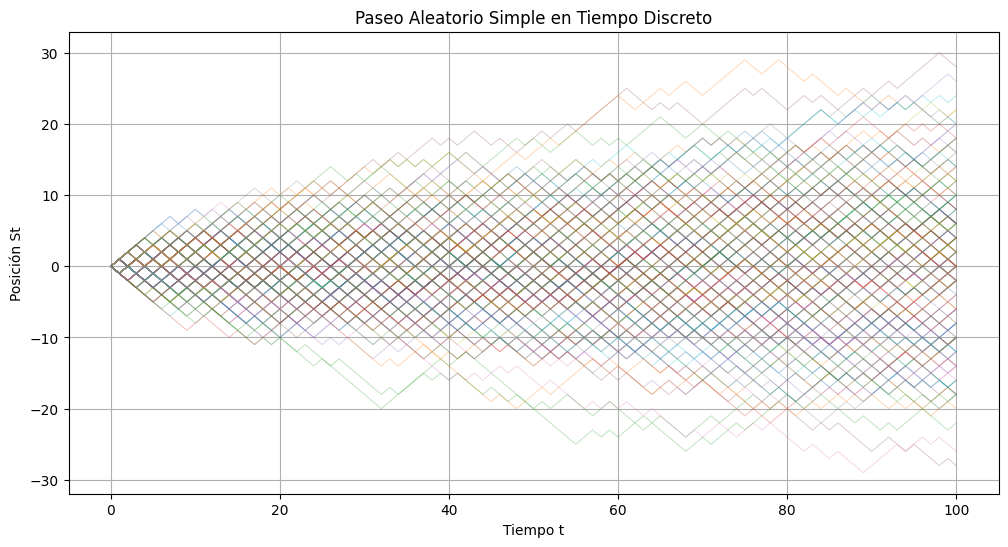

In [130]:
plt.figure(figsize=(12, 6))
for i in range(n_realizaciones):
    plt.plot(np.arange(0, T + 1), S_discreto[i], alpha=0.3, linewidth=0.7)

plt.title("Paseo Aleatorio Simple en Tiempo Discreto")
plt.xlabel("Tiempo t")
plt.ylabel("Posición St")
plt.grid(True)
plt.savefig('results/01_paseo_aleatorio_simple_discreto.png')
plt.show()

## **Parte 2. Paseo Aleatorio Simple en tiempo continuo.**

Consideremos ahora la versión del **paseo aleatorio simple en tiempo continuo** donde $X_t \sim N(0,1)$ son variables aleatorias i.i.d. normales estándar.

Se pide:
1. Fijar la semilla de reproducibilidad en 987.
2. Generar 200 realizaciones del paseo aleatorio en tiempo continuo.
3. Representar gráficamente las trayectorias de las 200 simulaciones en la misma figura.

### Paso 1. Fijar la semilla de reproducibilidad.

In [131]:
np.random.seed(987)

### Paso 2. Definir los parámetros del paseo aleatorio.

In [132]:
n_realizaciones = 200 # Número de realizaciones.
T = 100 # Número de pasos en el tiempo.

In [133]:
X = np.random.normal(0, 1, size=(n_realizaciones, T)) # Generación de variables aleatorias.
S = np.cumsum(X, axis=1) # Suma acumulada de las realizaciones.
S0 = np.zeros((n_realizaciones, 1)) # Inicialización de la suma acumulada.
S_continuo = np.hstack((S0, S))

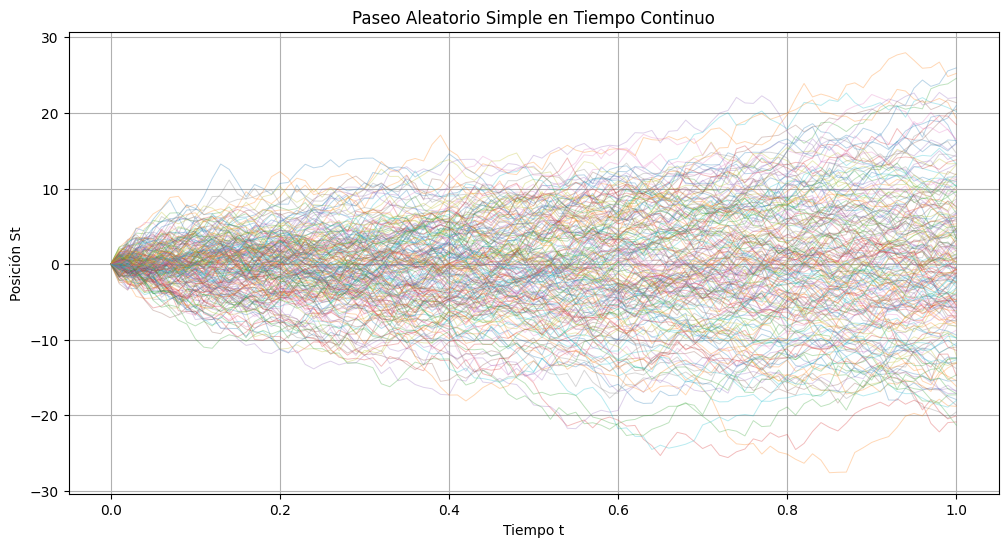

In [134]:
plt.figure(figsize=(12, 6))
for i in range(n_realizaciones):
    plt.plot(np.linspace(0, 1, T + 1), S_continuo[i], alpha=0.3, linewidth=0.7)

plt.title("Paseo Aleatorio Simple en Tiempo Continuo")
plt.xlabel("Tiempo t")
plt.ylabel("Posición St")
plt.grid(True)
plt.savefig('results/02_paseo_aleatorio_simple_continuo.png')
plt.show()

## **Parte 3. Cálculo de Media y Varianza en Instantes Específicos.**

Consideremos ahora el **paseo aleatorio simple en tiempo discreto** de la Parte 1. Para analizar la evolución del proceso, se pide:

1. Calcular la **media muestral** y la **varianza muestral** de  $S_t$  en los tiempos: $t = 5$, $t = 15$ y $t = 25$.
2. Comprobar que los resultados son acordes a lo visto en clase.

### Paso 1. Selección de los instantes específicos.

In [135]:
t_interes = [5, 15, 25] # Tiempos de interés.
S_t_select = S_discreto[:, t_interes] # Selección de las posiciones en los tiempos de interés.

### Paso 2. Calcular media y varianza muestral.

In [136]:
media = np.mean(S_t_select, axis=0)
varianza = np.var(S_t_select, axis=0, ddof=1) # Se utiliza ddof=1 para obtener la varianza muestral.

### Paso 3. Mostrar resultados.

In [137]:
resultados_df = pd.DataFrame({
    "Tiempo t": t_interes,
    "Media Muestral E[S_t]": media,
    "Varianza Muestral Var[S_t]": varianza,
})

In [138]:
resultados_df

,Tiempo t,Media Muestral E[S_t],Varianza Muestral Var[S_t]
0,5,0.02,4.904121
1,15,-0.10,15.185930
2,25,-0.09,22.665226


**Comprobación de los resultados con la teoría.** Según la teoría del **paseo aleatorio simple**, las propiedades esperadas de $S_t$ son:

1. **Esperanza.** $E[S_t] = 0$ . Esto se debe a que los incrementos $X_t$ tienen media **cero**, por lo que la posición esperada en cualquier instante sigue siendo **cero**.

2. **Varianza teórica.** $\text{Var}(S_t) = t$. Dado que los incrementos son independientes y de igual distribución (i.i.d.), la varianza de la posición en el instante t es simplemente **igual a t**.

**Comparación entre resultados muestrales y teoría.**
| Tiempo $ t $ | Media Muestral $ E[S_t] $ | Varianza Muestral $ \text{Var}[S_t] $ | Teoría $ \text{Var}[S_t] = t $ |
|--------------|--------------------|--------------------|-------------------|
| 5            | 0.02 | 4.90 | 5                 |
| 15           | -0.10 | 15.19 | 15                |
| 25           | -0.09 | 22.67 | 25                |

**Conclusión.**
- La **media muestral** en los tiempos seleccionados es **cercana a 0**, lo que es **coherente con la teoría**.
- La **varianza muestral** está **muy cerca** del valor teórico $ \text{Var}(S_t) = t $, lo que confirma que el proceso sigue las propiedades esperadas del paseo aleatorio.

**Los resultados obtenidos concuerdan con lo visto en clase**.

## **Parte 4. Simulaciones de Montecarlo para obtener propiedades estadísticas.**

Repetir 5000 veces la simulación de la Parte 1 (es decir, se generarán 200 realizaciones del paseo aleatorio simple discreto en cada repetición). Para cada experimento:

1. Se generarán 200 realizaciones del paseo aleatorio simple discreto.
2. Se calcularán las medias muestrales y varianzas muestrales en $t = 5$, $t = 15$ y $t = 25$.
3. Se almacenarán los valores de media y varianza obtenidos en cada una de las 5000 repeticiones.

Al finalizar, se calcularán:

1. La media de las 5000 medias muestrales para cada $ t $.
2. La media de las 5000 varianzas muestrales para cada $ t $.

**Preguntas para reflexionar.**
- ¿Hacia qué valores esperas que converjan la media y la varianza muestral?
- ¿Cómo se relacionan estos valores con las propiedades teóricas del paseo aleatorio?
- ¿Cómo podrías verificar la ley de los grandes números en este contexto?

### Paso 1. Definir parámetros de la simulación de Montecarlo.

In [139]:
num_repeticiones = 5000
num_realizaciones = 200
T = 100
tiempos_especificos = [5, 15, 25]

### Paso 2. Inicializar arrays para almacenar resultados.

In [140]:
medias_muestrales = np.zeros((num_repeticiones, len(tiempos_especificos)))
varianzas_muestrales = np.zeros((num_repeticiones, len(tiempos_especificos)))

### Paso 3. Repetir la simulación 5000 veces.

In [141]:
np.random.seed(987)

In [142]:
for i in range(num_repeticiones):
    # Generar 200 realizaciones del paseo aleatorio
    X = np.random.choice([-1, 1], size=(num_realizaciones, T))
    S = np.cumsum(X, axis=1)
    S0 = np.zeros((num_realizaciones, 1))
    S_completo = np.hstack((S0, S))

    S_t_select = S_completo[:, tiempos_especificos]
    medias_muestrales[i, :] = np.mean(S_t_select, axis=0)
    varianzas_muestrales[i, :] = np.var(S_t_select, axis=0, ddof=1)

### Paso 4: Calcular la media de las 5000 medias y varianzas muestrales.

In [143]:
media_final = np.mean(medias_muestrales, axis=0)
varianza_final = np.mean(varianzas_muestrales, axis=0)

In [144]:
resultados_montecarlo_df = pd.DataFrame({
    "Tiempo t": tiempos_especificos,
    "Media Promedio de E[S_t]": media_final,
    "Varianza Promedio de Var[S_t]": varianza_final,
})

In [145]:
resultados_montecarlo_df

,Tiempo t,Media Promedio de E[S_t],Varianza Promedio de Var[S_t]
0,5,-0.000046,4.994342
1,15,-0.000312,14.971198
2,25,0.000184,24.973125
